# Diagnostic Metrics

**Course:** HUDK4050, Week 10

**Author:** Yutong Shen

**Assignment:** ICE7

## Evaluate ACA3 Model Performance

Clustering is used in ACA3. So Silhouette coefficient, silhouette plot, and Elbow method can be used to evaluate the model performance.

**Import the ACA3 Model**

In [1]:
# Import the packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Import data
data = pd.read_csv("CollegeScorecard.csv", low_memory=False)
data

,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,NPCURL,...,COMPL_RPY_3YR_RT_SUPP,NONCOM_RPY_3YR_RT_SUPP,DEP_RPY_3YR_RT_SUPP,IND_RPY_3YR_RT_SUPP,PELL_RPY_3YR_RT_SUPP,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,galileo.aamu.edu/netpricecalculator/npcalc.htm,...,0.578873239,0.373790022,0.442857143,0.45890411,0.443586698,0.452513966,0.484818805,0.406,0.423580786,0.44245283
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,www.collegeportraits.org/AL/UAB/estimator/agree,...,0.847800926,0.678748759,0.767798013,0.739164697,0.732297853,0.795454545,0.760521886,0.755344418,0.751552795,0.765074771
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,tcc.noellevitz.com/(S(miwoihs5stz5cpyifh4nczu0...,...,0.807692308,0.61328125,PrivacySuppressed,0.641114983,0.600877193,0.775,0.610465116,0.686567164,0.632653061,0.65
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.892045455,0.689788054,0.800347222,0.75564409,0.738341969,0.851405622,0.768378651,0.79844098,0.778156997,0.791666667
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/email/index.aspx,www.alasu.edu/cost-aid/forms/calculator/index....,...,0.482490272,0.315996848,0.32410212,0.350993377,0.320016821,0.380829016,0.364423718,0.286530612,0.315737052,0.334633385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,48285703,157107,1571,Georgia Military College-Columbus Campus,Columbus,GA,31909,NaN,http://columbus.gmc.cc.ga.us/,NaN,...,0.586956522,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871
7800,48285704,157101,1571,Georgia Military College-Valdosta Campus,Valdosta,GA,31605,NaN,http://valdosta.gmc.cc.ga.us/,NaN,...,0.586956522,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871
7801,48285705,157105,1571,Georgia Military College-Warner Robins Campus,Warner Robins,GA,31093,NaN,http://robins.gmc.cc.ga.us/,NaN,...,0.586956522,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871
7802,48285706,157100,1571,Georgia Military College-Online,Milledgeville,GA,31061,NaN,http://online.gmc.cc.ga.us/,NaN,...,0.586956522,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871


In [3]:
data[data['CURROPER'] == 1]  # currently operating institutions

# Merge NPT4_PUB with NPT4_PRIV, NPT41_PUB with NPT41_PRIV, COSTT4_A with COSTT4_P, and NUM4_PUB with NUM4_PRIV
listRV = ['NPT4_PUB', 'NPT4_PRIV', 'NPT41_PUB', 'NPT41_PRIV', 'COSTT4_A', 'COSTT4_P', 'NUM4_PUB', 'NUM4_PRIV']
for x in listRV:
    data[x] = data[x].fillna(0)
    
data['NPT4_PUBPRIV'] = data['NPT4_PUB'] + data['NPT4_PRIV']
data['NPT41_PUBPRIV'] = data['NPT41_PUB'] + data['NPT41_PRIV']
data['COSTT4'] = data['COSTT4_A'] + data['COSTT4_P']
data['NUM4_PUBPRIV'] = data['NUM4_PUB'] + data['NUM4_PRIV']

In [4]:
# Select variables
dataS = data[['UNITID', 'CONTROL', 'LOCALE', 'CCSIZSET', 'DISTANCEONLY', 'NPT4_PUBPRIV', 'NPT41_PUBPRIV', 'NUM4_PUBPRIV', 'COSTT4', 'PFTFAC', 
              'AVGFACSAL', 'TUITFTE', 'INEXPFTE', 'C150_4_POOLED', 'PCTFLOAN']]

In [5]:
# Drop missing values
dataNA = dataS.dropna()

In [6]:
data_noid = dataNA.drop(['UNITID'], axis = 1)

### Silhouette coefficient and silhouette plot

Completed in ACA3

### Elbow Method

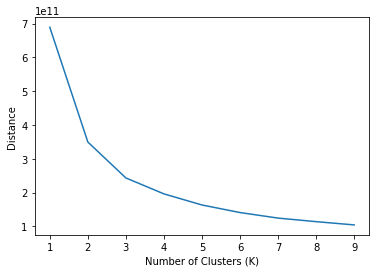

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

cluster_range = range(1,10)
avg_distance=[]

for n in cluster_range:
    clusterer = KMeans(n_clusters = n).fit(data_noid)
    avg_distance.append(clusterer.inertia_)

plt.plot(cluster_range, avg_distance)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Distance")
plt.show()

As shown above, by fitting the model with a range of values for K, we can see that the elbow point is when K=2. Our ACA3 model did pick K=2, so the model has selected the optimal number of clusters.